# Deep Learning-Based Image Geometric Rectification Demo

### 1081 Digital Image Processing Term Project
Heng-Jui Chang, NTU EE

In [1]:
from pathlib import Path
from os.path import join, getsize
import IPython.display as ipd
from IPython.display import display

import numpy as np
import torch
import matplotlib.pyplot as plt

from demo import Demo

np.random.seed(0)
torch.manual_seed(0)

cuda_id = 1 # Set CUDA ID for running model on GPU
if torch.cuda.is_available():
    device = torch.device('cuda:{}'.format(cuda_id))
    torch.cuda.manual_seed_all(0)
else:
    device = torch.device('cpu')

## Set model & image path

In [2]:
task = 'grid' # 'grid' or 'rvl-cdip'
config = 'config/test.yaml'

if task == 'grid':
    model_path = 'ckpt/GEORECT_GRID3_0/best_model.pth'
else:
    model_path = 'ckpt/GEORECT_LARGE_0/best_model.pth'
    
fig_path = 'demo_result/'

## Load Model

In [3]:
geo_demo = Demo(config, device)
geo_demo.load_model(model_path, gaussian=20)

[INFO] No background


## Demo

In [4]:
seed = 22  # Set random seed to test different distorted images

if task == 'grid':
    filename = 'dataset/grids/grid_0.jpg'
else:
    filename = 'test_sample/RVL-CDIP_0.tif'
clamp = [-200, 200]

In [5]:
geo_demo.run(filename, seed=seed, clamp=clamp)

Setting random seed...
Forward...
Generating images...


Loss: 3.51530
Original Image


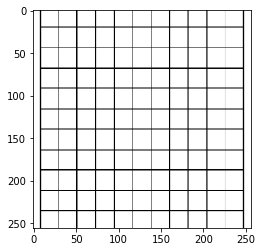

Distorted Image


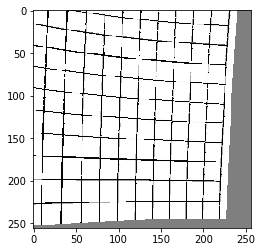

Restored Image


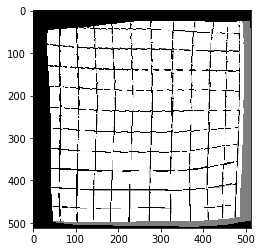

Restored Image (Ground Truth)


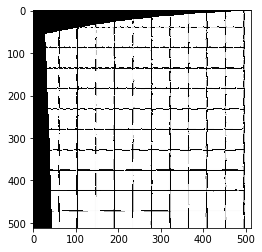

Coordinate Transformation (Ground Truth)


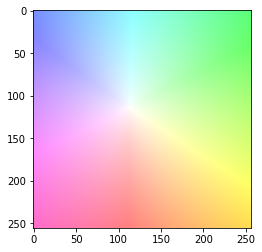

Coordinate Transformation (Predicted)


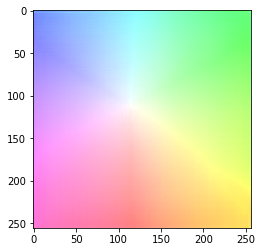

Coordinate Transformation (Smoothed)


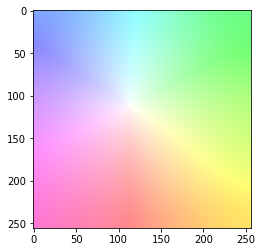

<Figure size 432x288 with 0 Axes>

In [6]:
geo_demo.show()

In [7]:
# geo_demo.save(fig_path, seed, task)